## **DS0121 MUHAMMAD SHABRI ARRAHIM MARDI**

# **Multiple Linear Regression**
Dibawah ini merupakan contoh implementasi ***Multi Linear Regression*** dengan menggunakan menggunakan methode ***Linear Regression*** dan ***Random Forest Regression***. Dari hasil uji kedua metode tersebut dengan menggunakan dataset [Pie Sales](https://github.com/rc-dbe/dti/blob/main/data/pie-sales.csv) didapatkan hasil bahwa metode ***Random Forest Regression*** lebih unggul dibandingkan methode  ***Linear Regression*** biasa dengan skor R^2 sebesar 0.88 (88%).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


In [ ]:
X = df[['price', 'advertising']].values.reshape(-1, 2)
y = df['pie_sales'].values.reshape(-1)
xx_1, xx_2 = np.meshgrid(np.linspace(df.price.min(), df.price.max(), 100),
                     np.linspace(df.advertising.min(), df.advertising.max(), 100))
new_xx = pd.DataFrame({'Price': xx_1.ravel(), 'Avertising': xx_2.ravel()})
weeks = df['week'].values.reshape(-1)

In [ ]:
def show_distribution(x=None, y=None, z=None, xs=None, ys=None, model=None, title=None, label=None):
  fig = plt.figure(figsize=(20, 20))
  ax1 = fig.add_subplot(331, projection='3d')
  ax2 = fig.add_subplot(332, projection='3d')
  ax3 = fig.add_subplot(333, projection='3d')

  axes = [ax1, ax2, ax3]

  for ax in axes:
    ax.scatter(x, y, z, c='red', marker='o', alpha=0.5)
    if xs is not None:
      ax.plot_surface(xs, ys, model.reshape(xs.shape), color='b', alpha=0.3)
    ax.set_xlabel(label[0], fontsize=10)
    ax.set_ylabel(label[1], fontsize=10)
    ax.set_zlabel(label[2], fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=4, axis='y')
    ax.set_title(title)

  ax1.view_init(elev=27, azim=112)
  ax2.view_init(elev=16, azim=-51)
  ax3.view_init(elev=60, azim=165)

In [ ]:
def show_score(r_scores, p_scores, weeks, title):
  fig, ax = plt.subplots(1,1, figsize=(15,5))
  ax.plot(weeks, p_scores, '-o', label='Prediksi penjualan pie', alpha=0.9)
  ax.plot(weeks, r_scores, '-*', label='Penjualan pie (nilai sesungguhnya)', alpha=0.9)
  ax.set_title(title, fontsize=16)
  ax.set_xlabel('Weeks', fontsize=14)
  ax.set_ylabel('Sales', fontsize=14)
  ax.set_xticks(weeks)
  ax.legend()

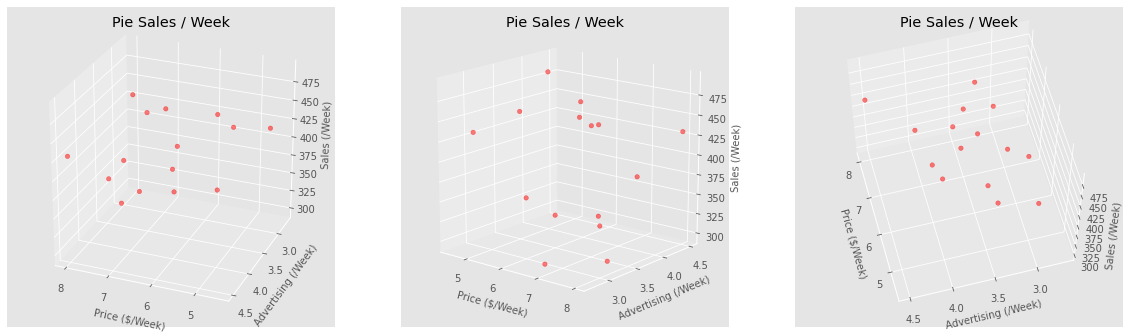

In [ ]:
label = ['Price ($/Week)', 'Advertising (/Week)', 'Sales (/Week)']
title = 'Pie Sales / Week'

show_distribution(x=X[:, 0], y=X[:, 1], z=y[:], title=title, label=label)

Dari visualisai data diatas, terlihat bahwa distribusi data untuk variabel ***Price*** dan ***Advertising*** menunjukan adanya linearitas terhadap penjualan ***Pie (Pie Sales)*** yaitu semakin rendah harga Pie maka penjualan Pie akan semakin meningkat (berbanding terbalik), sebaliknya semakin banyak jumlah pengiklanan (advertising) maka akan semakin tinggi juga jumlah penjualan (berbanding lurus).

## Linear Regression Model

Berikut ini akan digunakan metode Linear Regression menggunakan libary dari Sklearn. datasets akan coba didekati dengan pendekatan Linear Regression.  


In [ ]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_y = model.predict(X)
score = model.score(X, y)
intercept = model.intercept_
coefficient = model.coef_
print('Intercept: ', intercept)
print('Coefficients: ', coefficient)
print('Coefficient of determination (r^2): ', score)

Intercept:  306.5261932837436
Coefficients:  [-24.97508952  74.13095749]
Coefficient of determination (r^2):  0.5214779360292288


Terlihat bahwa dengan menggunakan linear regression didapatkan ***Inercept*** sebesar 306.52, ***Coefficient*** sebesar -24.97 dan 74.13 serta ***Coefficient of determination (r^2)*** sebesar  0.52 (52%).

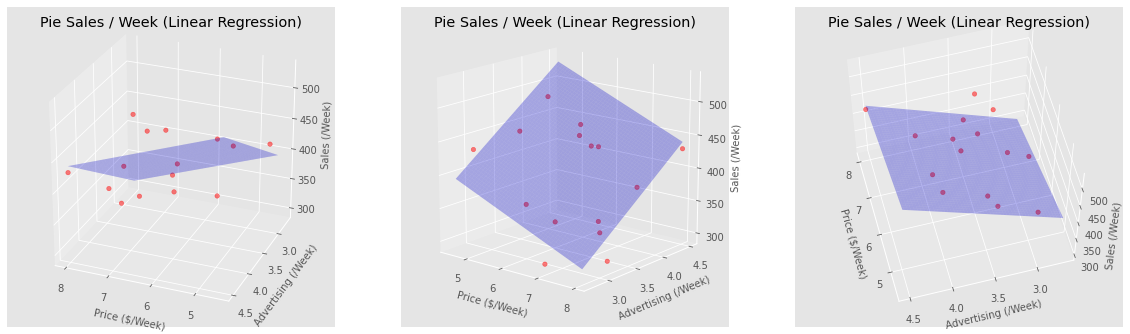

In [ ]:
pred_yy = model.predict(new_xx)
show_distribution(X[:, 0], X[:, 1], y[:], xs=xx_1, ys=xx_2, model=pred_yy, title=title, label=label)

Berdasarkan hasil visualisasi model terlihat bahwa hubungan antara antara variable Dependent dan Independant cukup lemah.

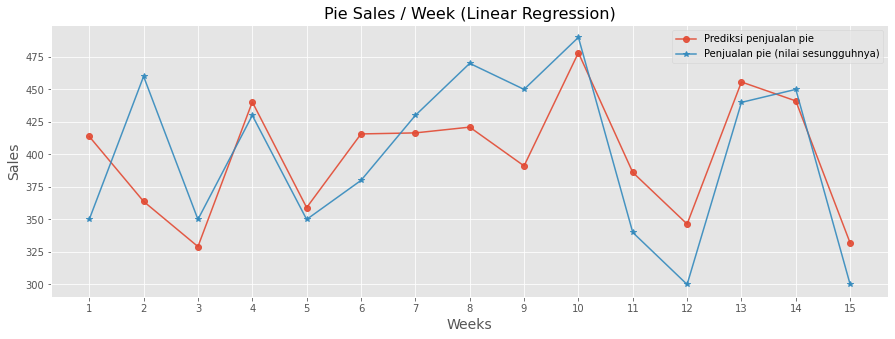

In [ ]:
title = 'Pie Sales / Week (Linear Regression)'
show_score(r_scores=y, p_scores=pred_y, weeks=weeks, title=title)

Dari hasil prediksi penjualan Pie dari model juga terlihat bahwa masih terlihat gap yang cukup besar antara prediksi penjualan dengan data penjualan yang sebenarnya.

## Random Forest Regression Model

Berikut ini akan digunakan metode Random Forest Regression menggunakan libary dari Sklearn. datasets akan coba didekati dengan pendekatan Random Forest Regression.  

In [ ]:
def run_validation_on_trees(X, y, tree_depths):
    scores_list = []
    model_list = []
    for depth in tree_depths:
        model = RandomForestRegressor(n_estimators=10, max_depth=depth).fit(X, y)
        scores = model.score(X, y)
        scores_list.append(scores)
        model_list.append(model)
    
    return np.array(scores_list), model_list 

In [ ]:
tree_depths = range(1,25)
score, model_RF = run_validation_on_trees(X, y, tree_depths)
model_RF = model_RF[score.argmax()]

In [ ]:
score_RF = score[score.argmax()]
pred_y_RF = model_RF.predict(X)
print('Coefficient of determination (r^2): ', score_RF)

Coefficient of determination (r^2):  0.8859865470852017


Terlihat bahwa dengan menggunakan random forest regression  didapatkan ***Coefficient of determination (r^2)*** sebesar  0.88 (88%). Model sudah dapat memprediksi distribusi data dengan baik.

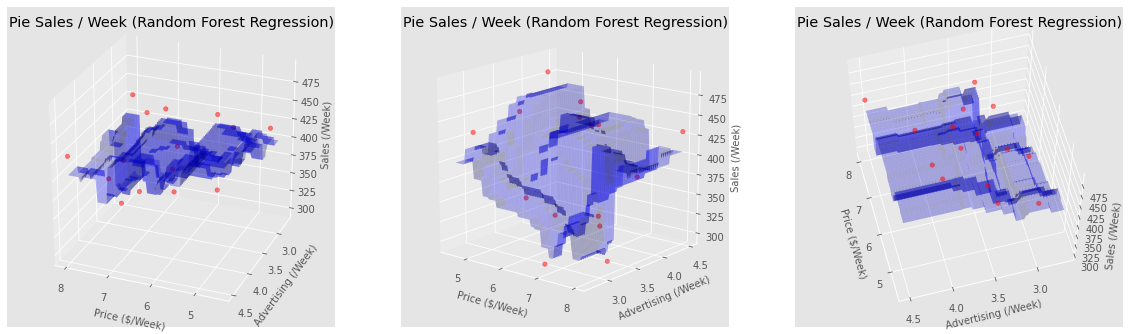

In [ ]:
pred_yy_RF = model_RF.predict(new_xx)
show_distribution(X[:, 0], X[:, 1], y[:], xs=xx_1, ys=xx_2, model=pred_yy_RF, title=title, label=label)

Berdasarkan visualisasi model disatas, terlihat bahwa metode random forest regression sudah dapat mendekati distribusi data dengan cukup baik.

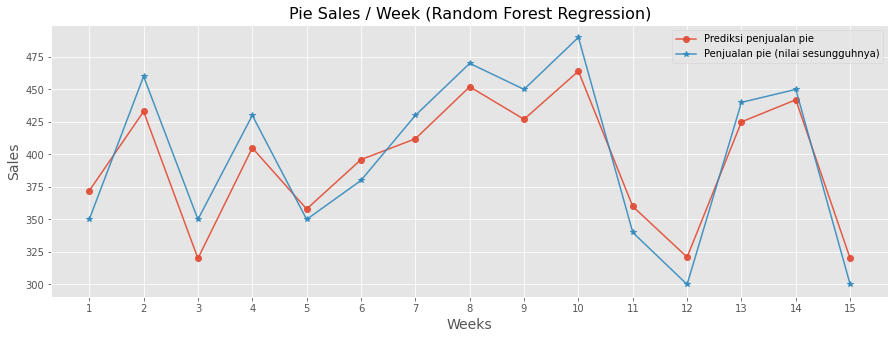

In [ ]:
title = 'Pie Sales / Week (Random Forest Regression)'
show_score(r_scores=y, p_scores=pred_y_RF, weeks=weeks, title=title)

Dibuktikan juga dengan hasil prediksi model yang sudah dapat mendekati distribusi data yang sebenarnya. Dapat dilihat dari hasil visualisasi diatas. 

# **Kesimpulan**

Dari hasil uji kedua metode tersebut dengan menggunakan dataset [Pie Sales](https://github.com/rc-dbe/dti/blob/main/data/pie-sales.csv) didapatkan hasil bahwa metode ***Random Forest Regression*** lebih unggul dibandingkan methode  ***Linear Regression*** biasa dengan skor R^2 sebesar 0.88 (88%).